## Error bound for forward finite difference approximation

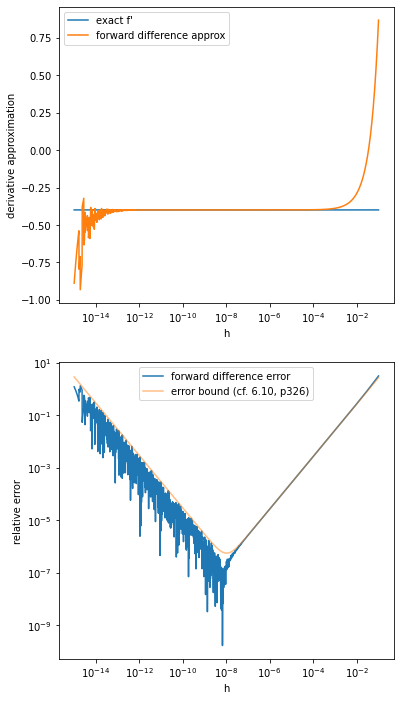

In [3]:
#%matplotlib notebook
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
x = sp.symbols('x')
y = 3*x + sp.sin(7*x**2/(1+x))  # example from last time 
yp = sp.diff(y,x).simplify()
ypp= sp.diff(y,x,x).simplify()
f        = sp.lambdify(x,y ,'numpy')
fp_exact = sp.lambdify(x,yp,'numpy')
fpp_exact = sp.lambdify(x,ypp,'numpy')

h = 10**np.linspace(-15,-1,2000)
x = 1.1
fp_fd = (f(x+h)-f(x))/h  # forward difference approximation to derivative of f for many different h values
error = np.abs(fp_fd - fp_exact(x))
relerr = error/np.abs(fp_exact(x))
import matplotlib.pyplot as plt
plt.figure(figsize=(6,12))
plt.subplot(211)
plt.semilogx(h,fp_exact(x)+0*h,label='exact f\'')
plt.semilogx(h,fp_fd,label='forward difference approx')
plt.legend()
plt.xlabel('h'); plt.ylabel('derivative approximation')
plt.subplot(212)
plt.loglog(h,relerr,label='forward difference error')
emach = 2**(-52)
M0 = np.abs(f(x))
M1 = np.abs(fp_exact(x))
M2 = np.abs(fpp_exact(x))

mu = 2 # estimate of multiple of emach/2 in error of evaluating f

relerr_bound = h/2*M2/M1 + emach/2*(1+2*mu*M0/M1)/h  + (3+ mu + M2/M1 )*emach/2  
plt.loglog(h,relerr_bound,label='error bound (cf. 6.10, p326)',alpha=0.5)

plt.legend()
plt.xlabel('h'); plt.ylabel('relative error');

In [14]:
import sympy as sp
x,h,f,fp,fpp,e,e1,e2,e3,e4,e5 = sp.symbols('x,h,f,fp,fpp,e,\epsilon_1:6')
d1,d2,d3,d4,d5 = e1*e,e2*e,e3*e,e4*e,e5*e
print('relative errror')
relerr = ( (f + (h+d1+d1*h)*fp + (h+d1+d1*h)**2/2*fpp )*(1+d2) - f - d3*f )*(1+d4)*(1+d5)/(h*fp) - 1
relerr = relerr.expand()
display(relerr)
print('leading order terms')
leading_relerr = relerr.subs({e**2:0,e**3:0,e**4:0,e**5:0})
display( leading_relerr.collect(h) )


relative errror


\epsilon_1**2*\epsilon_2*\epsilon_4*\epsilon_5*e**5*fpp*h/(2*fp) + \epsilon_1**2*\epsilon_2*\epsilon_4*\epsilon_5*e**5*fpp/fp + \epsilon_1**2*\epsilon_2*\epsilon_4*\epsilon_5*e**5*fpp/(2*fp*h) + \epsilon_1**2*\epsilon_2*\epsilon_4*e**4*fpp*h/(2*fp) + \epsilon_1**2*\epsilon_2*\epsilon_4*e**4*fpp/fp + \epsilon_1**2*\epsilon_2*\epsilon_4*e**4*fpp/(2*fp*h) + \epsilon_1**2*\epsilon_2*\epsilon_5*e**4*fpp*h/(2*fp) + \epsilon_1**2*\epsilon_2*\epsilon_5*e**4*fpp/fp + \epsilon_1**2*\epsilon_2*\epsilon_5*e**4*fpp/(2*fp*h) + \epsilon_1**2*\epsilon_2*e**3*fpp*h/(2*fp) + \epsilon_1**2*\epsilon_2*e**3*fpp/fp + \epsilon_1**2*\epsilon_2*e**3*fpp/(2*fp*h) + \epsilon_1**2*\epsilon_4*\epsilon_5*e**4*fpp*h/(2*fp) + \epsilon_1**2*\epsilon_4*\epsilon_5*e**4*fpp/fp + \epsilon_1**2*\epsilon_4*\epsilon_5*e**4*fpp/(2*fp*h) + \epsilon_1**2*\epsilon_4*e**3*fpp*h/(2*fp) + \epsilon_1**2*\epsilon_4*e**3*fpp/fp + \epsilon_1**2*\epsilon_4*e**3*fpp/(2*fp*h) + \epsilon_1**2*\epsilon_5*e**3*fpp*h/(2*fp) + \epsilon_1**2*\e

leading order terms


\epsilon_1*e + \epsilon_1*e*fpp/fp + \epsilon_2*e + \epsilon_4*e + \epsilon_5*e + h*(\epsilon_1*e*fpp/fp + \epsilon_2*e*fpp/(2*fp) + \epsilon_4*e*fpp/(2*fp) + \epsilon_5*e*fpp/(2*fp) + fpp/(2*fp)) + (\epsilon_1*e + \epsilon_2*e*f/fp - \epsilon_3*e*f/fp)/h

In [15]:
pwd

'/home/ringland/public_html/537/day18_f25'

### Zooming in to see the variation with h in detail

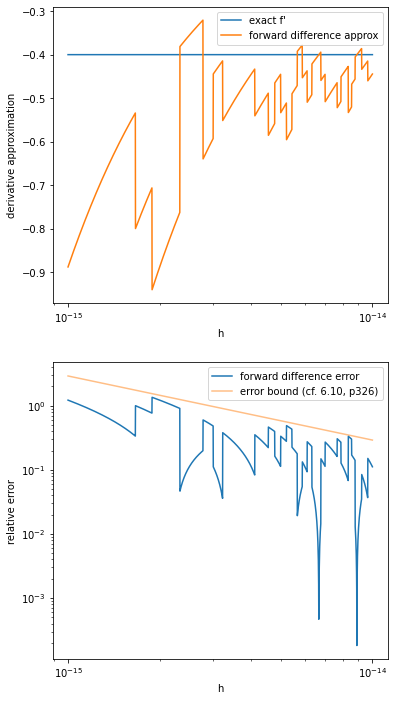

In [15]:
#%matplotlib notebook
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
x = sp.symbols('x')
y = 3*x + sp.sin(7*x**2/(1+x))  # example from last time 
yp = sp.diff(y,x).simplify()
ypp= sp.diff(y,x,x).simplify()
f        = sp.lambdify(x,y ,'numpy')
fp_exact = sp.lambdify(x,yp,'numpy')
fpp_exact = sp.lambdify(x,ypp,'numpy')

h = 10**np.linspace(-15,-14,2000)
x = 1.1
fp_fd = (f(x+h)-f(x))/h  # forward difference approximation to derivative of f for many different h values
error = np.abs(fp_fd - fp_exact(x))
relerr = error/np.abs(fp_exact(x))
import matplotlib.pyplot as plt
plt.figure(figsize=(6,12))
plt.subplot(211)
plt.semilogx(h,fp_exact(x)+0*h,label='exact f\'')
plt.semilogx(h,fp_fd,label='forward difference approx')
plt.legend()
plt.xlabel('h'); plt.ylabel('derivative approximation')
plt.subplot(212)
plt.loglog(h,relerr,label='forward difference error')
emach = 2**(-52)
M0 = np.abs(f(x))
M1 = np.abs(fp_exact(x))
M2 = np.abs(fpp_exact(x))

mu = 2 # estimate of multiple of emach/2 in error of evaluating f

relerr_bound = h/2*M2/M1 + emach/2*(1+2*mu*M0/M1)/h  + (3+ mu + M2/M1 )*emach/2  
plt.loglog(h,relerr_bound,label='error bound (cf. 6.10, p326)',alpha=0.5)

plt.legend()
plt.xlabel('h'); plt.ylabel('relative error');

## Centered finite difference

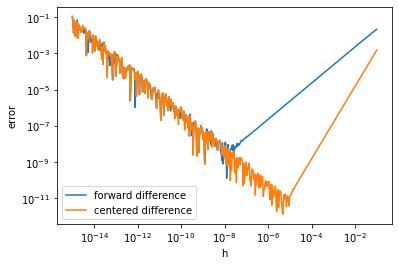

In [4]:
import numpy as np
def f(x): return np.cos(x)
def fp_exact(x): return -np.sin(x)

h = 10**np.linspace(-15,-1,500)
x = 1.1 
fp_fd = (f(x+h)-f(x))/h  #2 forward difference approximation to derivative of f for many different h values
fp_cd =(f(x+h)-f(x-h))/(2*h)  # forward difference approximation to derivative of f for many different h values
error = np.abs(fp_fd - fp_exact(x))
error2 = np.abs(fp_cd - fp_exact(x))

import matplotlib.pyplot as plt
plt.loglog(h,error ,label='forward difference')
plt.loglog(h,error2,label='centered difference')
plt.legend()
plt.xlabel('h'); plt.ylabel('error');

## An example for illustrating a Differentiation Arithmetic

In [11]:
x = sp.symbols('x')
y = x**2/(x-13)
y

x**2/(x - 13)

In [12]:
yp = sp.diff(y,x)
yp

-x**2/(x - 13)**2 + 2*x/(x - 13)

In [13]:
# evaluate y and y' at 3
y.subs({x:3}), yp.subs({x:3})    # use this to validate our AD answer

(-9/10, -69/100)

# Implementation of a differentiation arithemetic
with a gentle introduction to object-oriented programming in Python

In [36]:
import numpy as np

class ad:

    def __init__(self,val,der=0):   # allows c = ad(3)
        self.val = val
        self.der = der
        
    def __repr__(self):
        return f'< {self.val}, {self.der} >'
    
    def __add__(self,other):
        return ad( self.val + other.val  , self.der + other.der   )
    
    def __sub__(self,other):
        return ad( self.val - other.val  , self.der - other.der   )
    
    def __mul__(self,other):
        return ad( self.val * other.val  , self.der*other.val + self.val*other.der    )
    
    def __truediv__(self,other):
        return ad( self.val / other.val  , ( self.der*other.val - self.val*other.der )/ other.val**2  )
    
    def sin(self):
        return ad( np.sin( self.val ), np.cos(self.val)*self.der )
    
# to allow use of syntax sin(f)
def sin(x):
    if isinstance(x,ad):
        return x.sin()
    else:
        return np.sin(x)
    
# what we want to be able to do:

f = ad(3.4,-1.3)
g = ad(7,-2)
c = ad(3)
display(f)
display(g)
display(c)

f + g
print('product f*g')
display( f*g )

#sin(f)   # want to do this

f.sin()

sin(f)

< 3.4, -1.3 >

< 7, -2 >

< 3, 0 >

product f*g


< 23.8, -15.899999999999999 >

< -0.2555411020268312, 1.2568376503532994 >

## Check against symbolic differentiation

In [30]:
x = ad(3,1)
x*x

< 9, 6 >

In [31]:
x/x

< 1.0, 0.0 >

In [32]:
x + x

< 6, 2 >

In [33]:
x - x

< 0, 0 >

In [34]:
seven = ad(7,0)
seven*x

< 21, 7 >

In [37]:
z = ad(np.pi/2)
sin(z)

< 1.0, 0.0 >

In [22]:
x = sp.symbols('x')
y = 3*x + sp.sin(7*x**2/(1+x))
y

3*x + sin(7*x**2/(x + 1))

In [23]:
yprime = sp.diff(y,x)
yprime

(-7*x**2/(x + 1)**2 + 14*x/(x + 1))*cos(7*x**2/(x + 1)) + 3

In [26]:
y.subs({x:2.}),yprime.subs({x:2.})

(6.09131723555475, -3.19622486179360)

In [38]:
x = ad(2.,1.)
three = ad(3,0)
seven = ad(7,0)
one   = ad(1,0)
y = three*x + sin(seven*x*x/(one+x))y = 3*x + sp.sin(7*x**2/(1+x))

y

< 6.091317235554749, -3.1962248617936035 >